# Intel® VTune™ Profiler


**Intel® VTune™ Profiler** optimizes application performance, system performance, and system configuration for HPC, cloud, IoT, media, storage, and more.
- **CPU, GPU, and FPGA**: Tune the entire application’s performance―not just the accelerated portion.
- **Multilingual**: Profile SYCL*, C, C++, C#, Fortran, OpenCL™ code, Python*, Google Go* programming language, Java*, .NET, Assembly, or any combination of languages.
- **System or Application**: Get coarse-grained system data for an extended period or detailed results mapped to source code.
- **Power**: Optimize performance while avoiding power- and thermal-related throttling. <br>

**For profiling python workloads** <br>
VTune requires minimal code modification. It also provides a GUI that is easy to use. It provides call stack information, flame graph, and hardware utilization. It can profile GPU workloads. It can profile individual threads. It provides memory consumption information. Profiling results can be shared very easily through web browser interface. It also gives low-level C, C++ functions that can be potential hotspots. The profiling overhead is high as compared to other profilers. <br>

**To get started with Intel VTune** visit the article **[Get Started with Intel® VTune™ Profiler](https://www.intel.com/content/www/us/en/docs/vtune-profiler/get-started-guide/2023/overview.html)** and follow the instructions. <br>

**To download the Intel VTune:**
- **[As Part of the Toolkit](https://www.intel.com/content/www/us/en/developer/tools/oneapi/base-toolkit-download.html)**: Intel VTune Profiler is included in the Intel® oneAPI Base Toolkit, which is a core set of tools and libraries for developing high-performance, data-centric applications across diverse architectures. 
- **[Stand-Alone Version (recommended for this notebook)](https://www.intel.com/content/www/us/en/developer/tools/oneapi/vtune-profiler-download.html)**: A stand-alone download of Intel VTune Profiler is available. You can download binaries from Intel or choose your preferred repository.<br>

**To get help about usage of Intel VTune** visit the article **[Intel® VTune™ Profiler User Guide](https://www.intel.com/content/www/us/en/docs/vtune-profiler/user-guide/2023-0/overview.html)**

**To know more about Intel VTune** visit the article **[Intel® VTune™ Profiler](https://www.intel.com/content/www/us/en/developer/tools/oneapi/vtune-profiler.html)**

## To Install VTune

1. **[Install Intel® VTune™ Profiler on your Linux* system.](https://www.intel.com/content/www/us/en/develop/documentation/vtune-install-guide/top/linux.html)**

2. Build your application with symbol information and in Release mode with all optimizations enabled. For detailed information on compiler settings, see the **[VTune Profiler online user guide.](https://software.intel.com/en-us/vtune-amplifier-help-compiler-switches-for-performance-analysis-on-windows-targets)** <br>
You can also use the matrix sample application available in <install_directory>\sample\matrix. You can see sample results in `<install-dir>\sample (matrix)`.

3. Set up the environment variables: <br>
    `source <install-dir>/setvars.sh`

    By default, the `install-dir` is: <br>
    
    `$HOME/intel/oneapi/` when installed with user permissions, and  <br>

    `/opt/intel/oneapi/` when installed with root permissions. <br>
4. You may need to set the value of the kernel.yama.ptrace_scope sysctl option to 0 <br>
`sysctl -w kernel.yama.ptrace_scope=0` <br>
     If you want to know how to get started with VTune and learn while using the VTune GUI visit this **[article](https://www.intel.com/content/www/us/en/docs/vtune-profiler/get-started-guide/2023/linux-os.html)**

### DL_VTune

When using VTune for profiling Python code, **DL_VTune** is a handy tool as it provides **ITT_TAGGING**, which can be used to profile blocks of code. We can choose **different starting and end points** and give names to different sections for profiling. <br>
To know more about **DL_VTune** visit its **[GitHub repo](https://github.com/intel-sandbox/DL_VTune)**

#### Pre-requisites for DL_VTune

- Intel VTune Profiler installation **[Refer to instructions here](#Install-and-Initialize-VTune)**
- TensorFlow or PyTorch installation. Need TensorFlow or PyTorch version with oneDNN ITT Tagging support. Please refer **[dev_guide_profilers](https://oneapi-src.github.io/oneDNN/dev_guide_profilers.html)** for details. <br>
**Note this is only needed if your workload has Tensorflow or PyTorch code. In our example we do not have tensorflow or Pytorch code, so we do not need it.** <br>
- `itt-python` installation: <br>
`conda install -c conda-forge itt-python`

##### Install DL_VTune

After all the Pre-requisites are installed, follow the below steps
- Clone the **[DL_VTune github repo](https://github.com/intel-sandbox/DL_VTune)** <br>
    `git clone https://github.com/intel-sandbox/DL_VTune` <br>
    `cd DL_VTune` <br>
    `pip install .` 

##### Using DL_VTune

We can create different domains so that VTune results can be visualized easily. 
**NOTE:** below is an example template to use **itt_tagging**. Change the  **"domain"** and **"DLTasks"** according to your need.

In [2]:
# import itt
# # ... 
# domain = itt.domain_create("domain")  ##Create Domain 
# itt.task_begin(domain, "DLTasks")     ##Begin a task
# # ... do the tasks                    #Code that is to be monitored
# itt.task_end(domain)                  #End the task

## Example to use **VTune** for **intelligent_indexing** ref kit 

The **[Intelligent Indexing](https://github.com/oneapi-src/intelligent-indexing)** ref kit demonstrates one way of building an NLP pipeline for classifying documents to their respective topics and describe how we can leverage the **Intel® AI Analytics Toolkit (AI Kit)** to accelerate the pipeline.

**Intel® AI Analytics Toolkit (AI Kit)** is used to achieve quick results even when the data for a model are huge. It provides the capability to reuse the code present in different languages so that the hardware utilization is optimized to provide these results.

The **Intelligent Indexing** ref kit has different Intel® oneAPI optimizations enabled like:
- **[Intel® Distribution of Modin*](https://www.intel.com/content/www/us/en/developer/tools/oneapi/distribution-of-modin.html#gs.v03x2l)**
The Intel® Distribution of Modin* is a performant, parallel, and distributed dataframe system that is designed around enabling data scientists to be more productive. It provides drop-in acceleration to your existing **pandas** workflows. No upfront cost to learning a new API. Integrates with the Python* ecosystem. Seamlessly scales across multicores with Ray* and Dask* clusters (run on and with what you have)
- **[Intel® Extension for Scikit-learn*](https://www.intel.com/content/www/us/en/developer/tools/oneapi/scikit-learn.html)**
Designed for data scientists, Intel® Extension for Scikit-Learn* is a seamless way to speed up your Scikit-learn applications for machine learning to solve real-world problems. This extension package dynamically patches scikit-learn estimators to use Intel® oneAPI Data Analytics Library (oneDAL) as the underlying solver, while achieving the speed up for your machine learning algorithms out-of-box.

**NOTE** Please visit the **[Intelligent Indexing](https://github.com/oneapi-src/intelligent-indexing)** Ref kit page to know more about the kit.
- Please follow the steps in github repo to clone and create the environment.
- After creating environment install **DL_VTune** in both the environments **doc_class_stock** and **doc_class_intel** using instructions above.

**We will be using **VTune** to profile this workload below.**

To know more about different types of analysis options available with **VTune** visit the **[article.](https://www.intel.com/content/www/us/en/docs/vtune-profiler/user-guide/2023-1/running-command-line-analysis.html)** <br>
To know how to use the command line interface for **VTune** visit the **[cheatsheet.](https://www.intel.com/content/dam/develop/external/us/en/documents/vtune-profiler-cheat-sheet.pdf)**

#### Profile the Intelligent Indexing Ref Kit with Stock packages

To run **performance profiling** on intelligent-indexing ref kit. 

1. Navigate to **intelligent-indexing/src/** 

   `cd intelligent-indexing/src/`

2. Create a file **run_benchmarks_vtune.py**. We have given one for your reference. You can directly create a copy of it in the above directory. 

3. Copy and paste the file at location **intelligent-indexing/src/**

4. Activate the environment 

   `conda activate doc_class_stock` 

5. Set the environment variables to use VTune 

   **Note:** replace `<install-dir>` with relevant directory where VTune is installed 

   `source <install-dir>/setvars.sh` 

6. You may need to set the value of the kernel.yama.ptrace_scope sysctl option to 0 

   `sysctl -w kernel.yama.ptrace_scope=0`


Run the command below in the **Terminal** to **collect a performance snapshot** using stock packages

`vtune -collect performance-snapshot -result-dir='../Profiling_Guide/Vtune_Profiler/VTune_Profiler_Results/stock_results/performance_snapshot_results/' -- python  run_benchmarks_vtune.py -l ../logs/stock_stock.log`

Run the command below in the **Terminal** to **collect hotspots** using stock packages

`vtune -collect hotspots -result-dir='../Profiling_Guide/Vtune_Profiler/VTune_Profiler_Results/stock_results/hotspots_results/' -- python  run_benchmarks_vtune.py -l ../logs/stock_stock.log`

##### To visulaize results

Make sure that you are in the same directory as before, **intelligent-indexing/src/**. <br>
Run the below command in **new terminal** window to visualize **VTune results.** <br>
**Note:** Set the environment variables again in new terminal <br>
**Note:** replace `<install-dir>` with relevant directory where VTune is installed <br>
`source <install-dir>/setvars.sh`

`vtune-backend --web-port=8080 --data-directory="'../Profiling_Guide/Vtune_Profiler/VTune_Profiler_Results/stock_results/" --allow-remote-access` <br>

Once this is done, follow the steps in the **To Interpret VTune Results** section of this notebook.

#### Profile Intelligent Indexing Ref Kit with Intel oneAPI optimized packages

To run **performance profiling** on intelligent-indexing ref kit. 

1. Navigate to **intelligent-indexing/src/** 

   `cd intelligent-indexing/src/`

2. Create a file **run_benchmarks_vtune.py**. We have given one for your reference. You can directly create a copy of it in the above directory. 

3. Copy and paste the file at location **intelligent-indexing/src/**

4. Activate the environment 

   `conda activate doc_class_intel` 
5. Set the environment variables to use VTune 

   **Note:** replace `<install-dir>` with relevant directory where VTune is installed 

   `source <install-dir>/setvars.sh` 
6. You may need to set the value of the kernel.yama.ptrace_scope sysctl option to 0 
   
   `sysctl -w kernel.yama.ptrace_scope=0` 

Run the command below in the **Terminal** to **collect a performance snapshot** using oneAPI optimized packages

`vtune -collect performance-snapshot -result-dir='../Profiling_Guide/Vtune_Profiler/VTune_Profiler_Results/oneapi_optimized_results/performance_snapshot_results/' -- python  run_benchmarks_vtune.py -i -l ../logs/intel_intel.log`

Run the command below in the **Terminal** to **collect hotspots** using oneAPI optimized packages

`vtune -collect hotspots -result-dir='../Profiling_Guide/Vtune_Profiler/VTune_Profiler_Results/oneapi_optimized_results/hotspots_results/' -- python run_benchmarks_vtune.py -i -l ../logs/intel_intel.log`

##### To visualize results

Make sure that you are in the same directory as before, **intelligent-indexing/src/**. <br>
Run the below command in **new terminal** window to visualize **VTune results.** <br>
**Note:** Set the environment variables again in new terminal <br>
**Note:** replace `<install-dir>` with relevant directory where VTune is installed <br>
`source <install-dir>/setvars.sh`

`vtune-backend --web-port=8080 --data-directory="../Profiling_Guide/Vtune_Profiler/VTune_Profiler_Results/oneapi_optimized_results/" --allow-remote-access` <br>

Once this is done, follow the steps in the **To Interpret VTune Results** section of this notebook.

### To Interpret VTune Results

Once you execute the **vtune-backend** command above, you will see a **url with port=8080**, paste the url in the browser and then you will be able to see a web-gui as shown below. Double-click the results on the left that you would like to analyze and then review the following steps. <br>
1. Go to the **Analysis Configuration** tab and verify the **Application parameters** as shown below. 

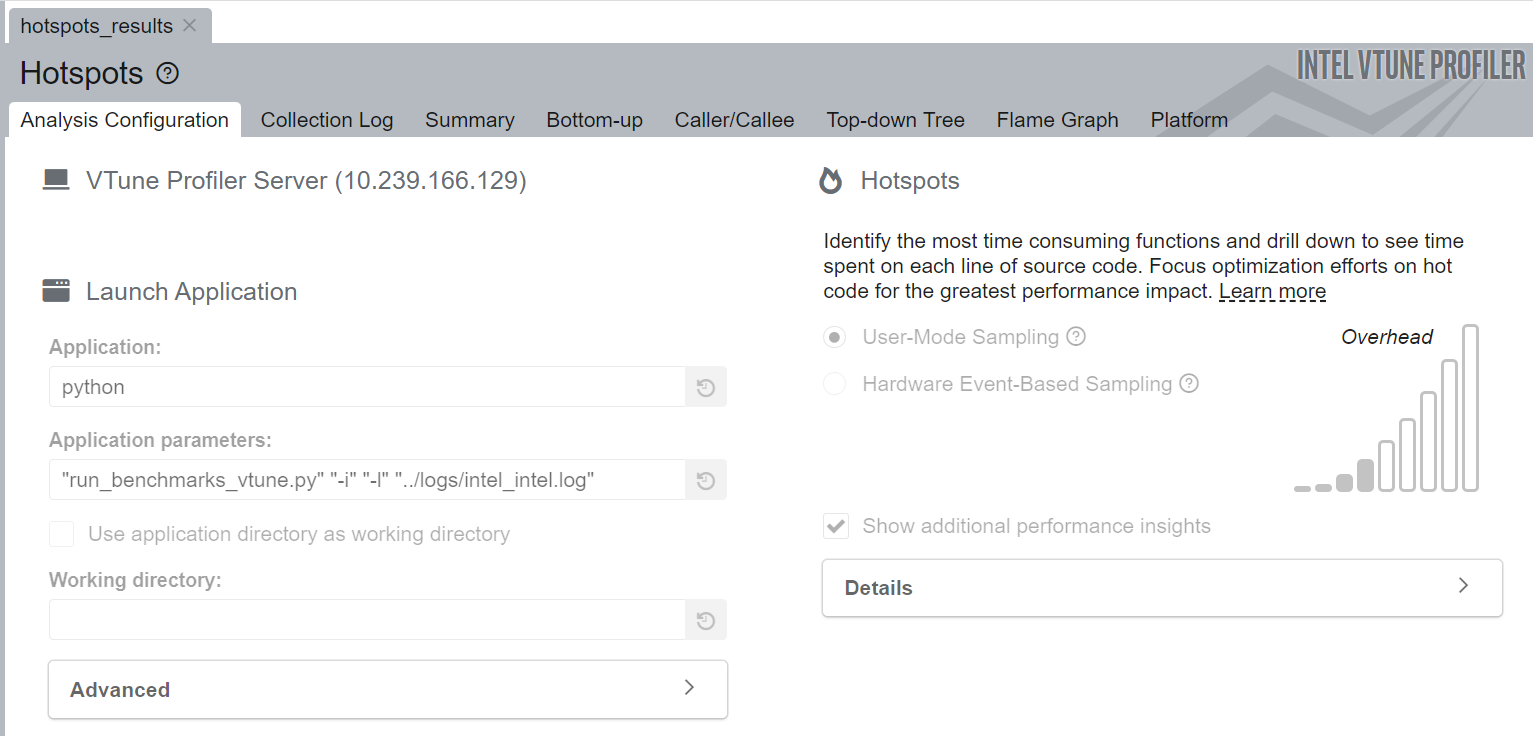

2. You can visit the **Summary** tab to get information about the total **Elapsed Time** and **Top Hotspots**

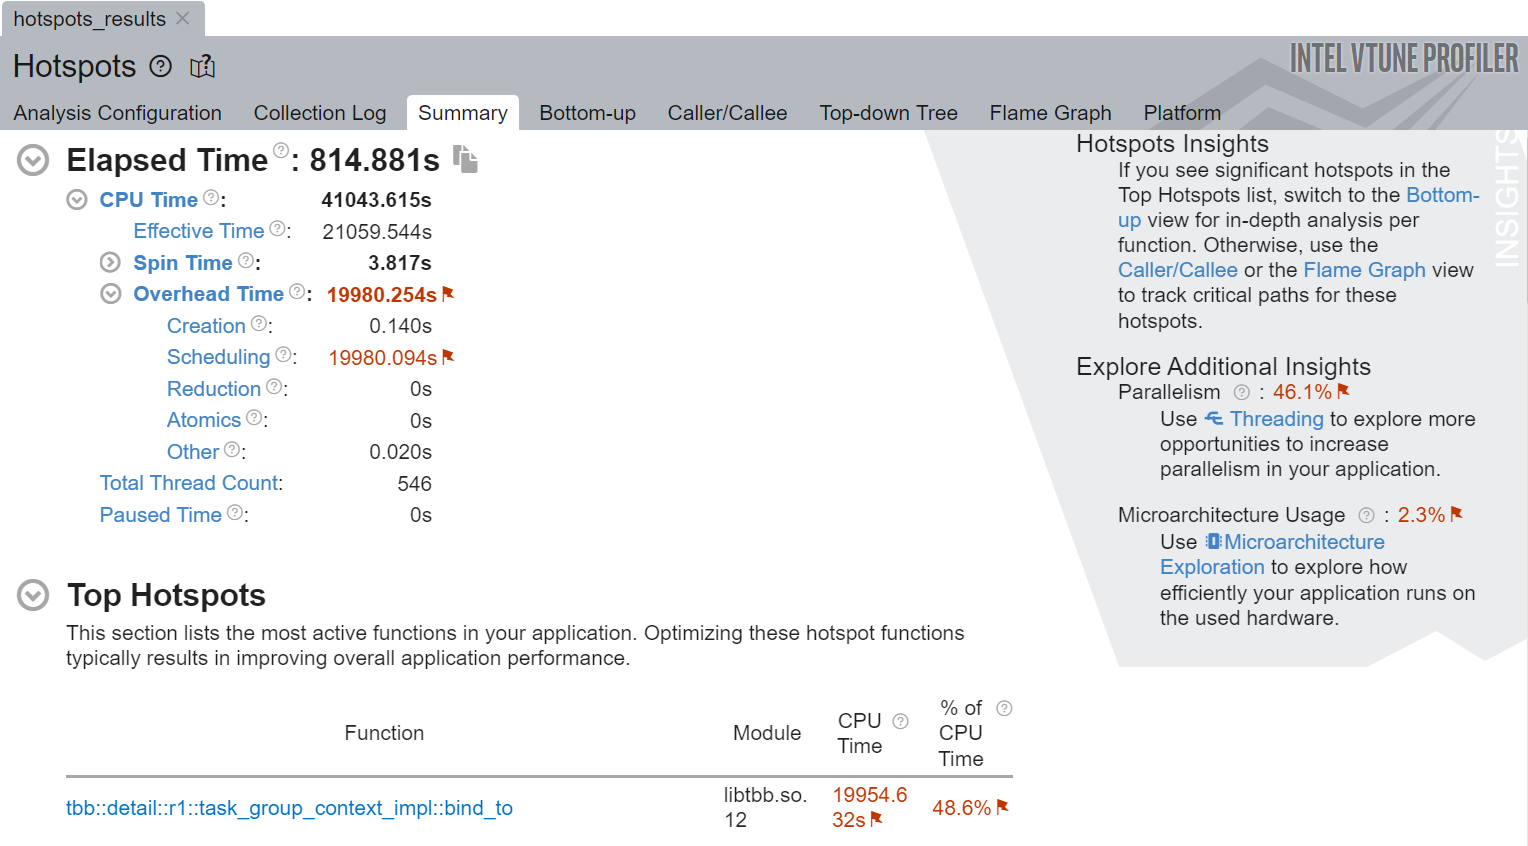

3. To view the **Call Stack** visit the **Bottom-up** tab. You can sort the results based on **CPU Time** by clicking the **⬇** adjoining it.

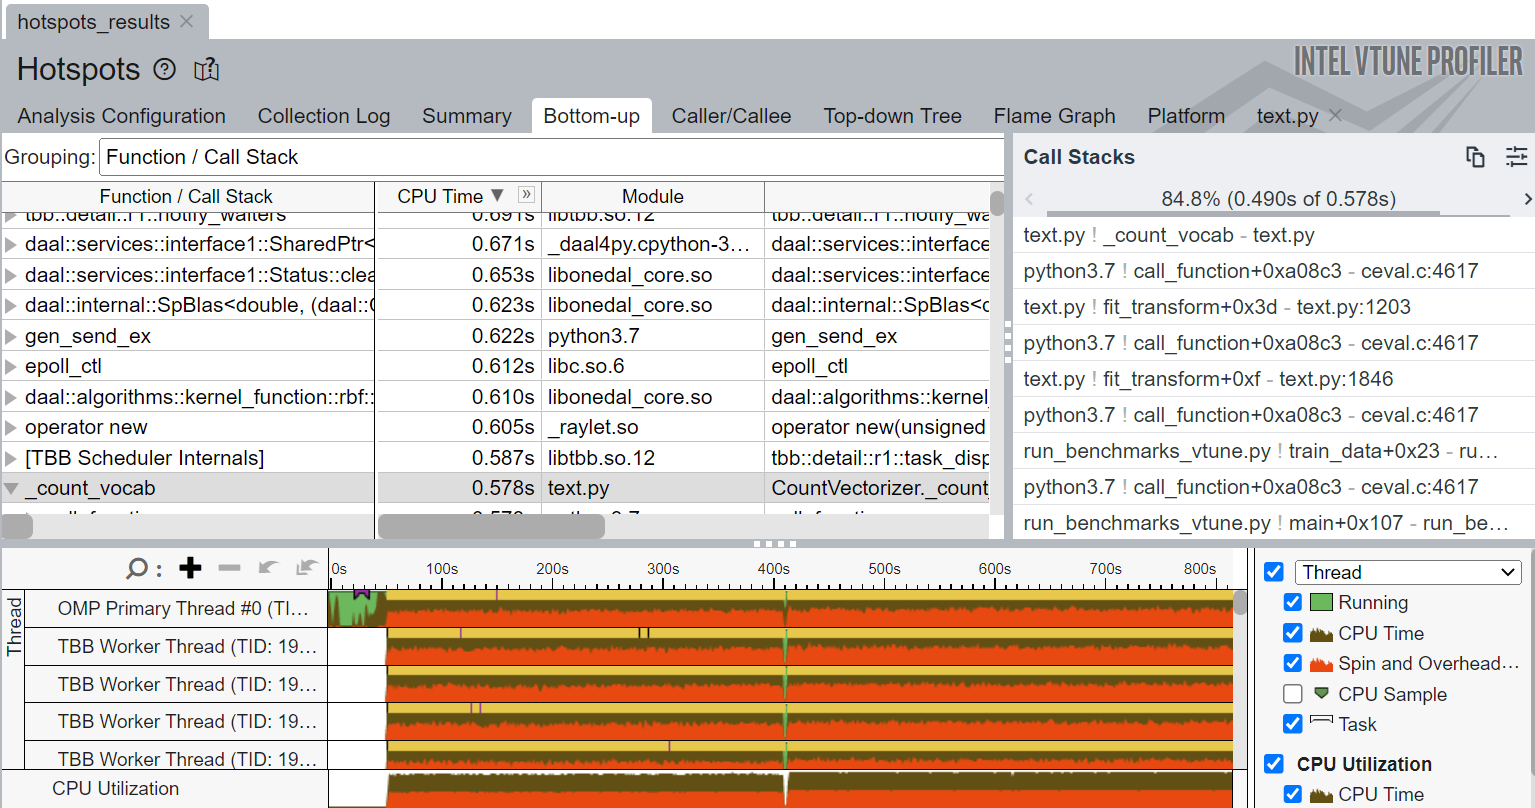

4. If you want to know the location of any module (for example: **_count_vocab**) in code. **Click** the module (**_count_vocab**) and a **new tab** will open. For example **text.py** in this case.

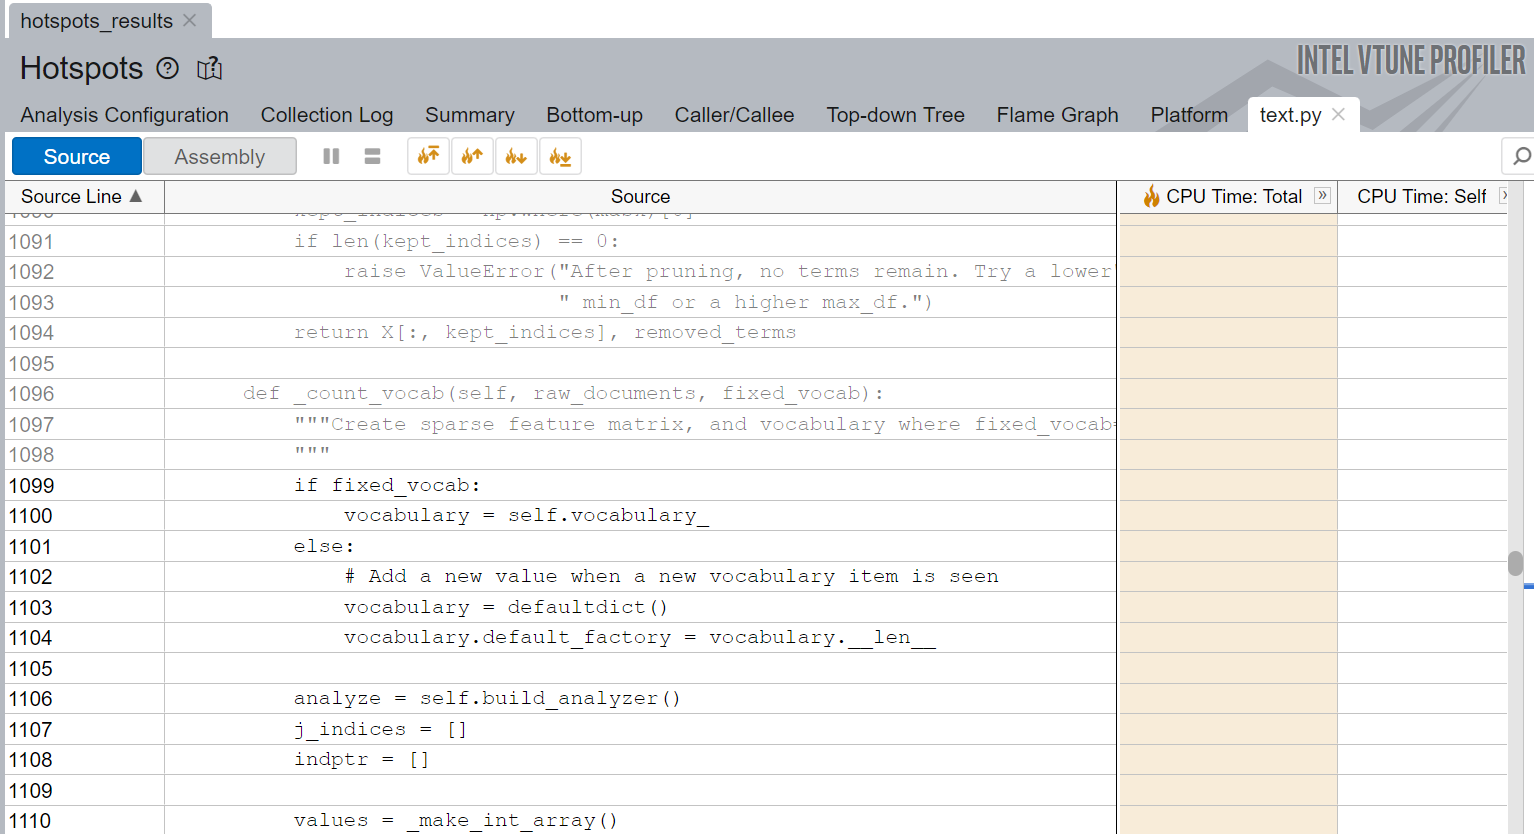

5. To see the **Caller/Callee** information visit the **Caller/Callee** tab. Once you **Click** any **function** it will show the **callers** and **callees** on the right side.  

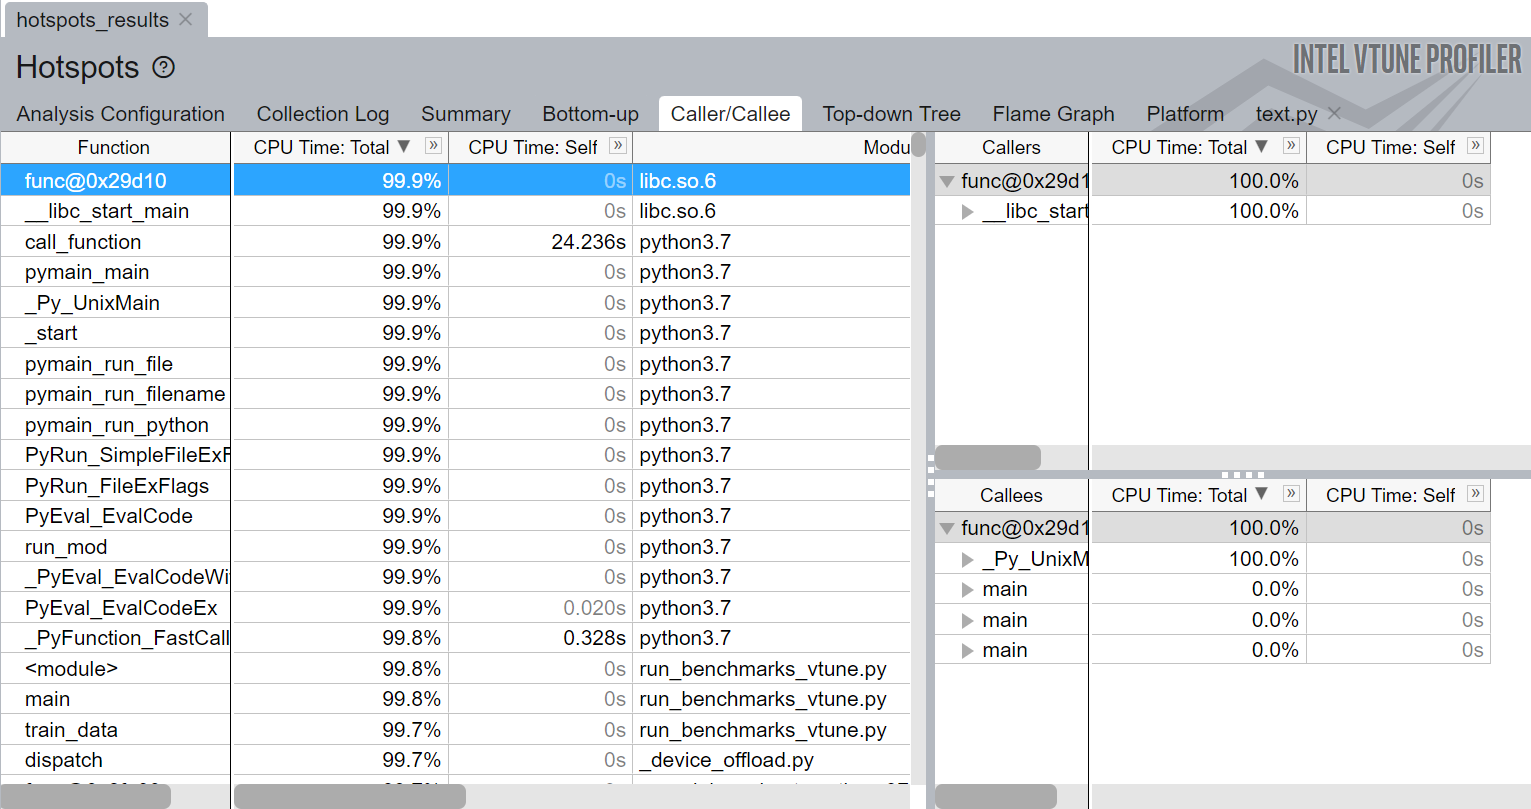

6. To view the **Top-down Tree** and check **CPU Time** visit the **Top-down Tree** tab and it will show the **module location** and **function** that calls the module.

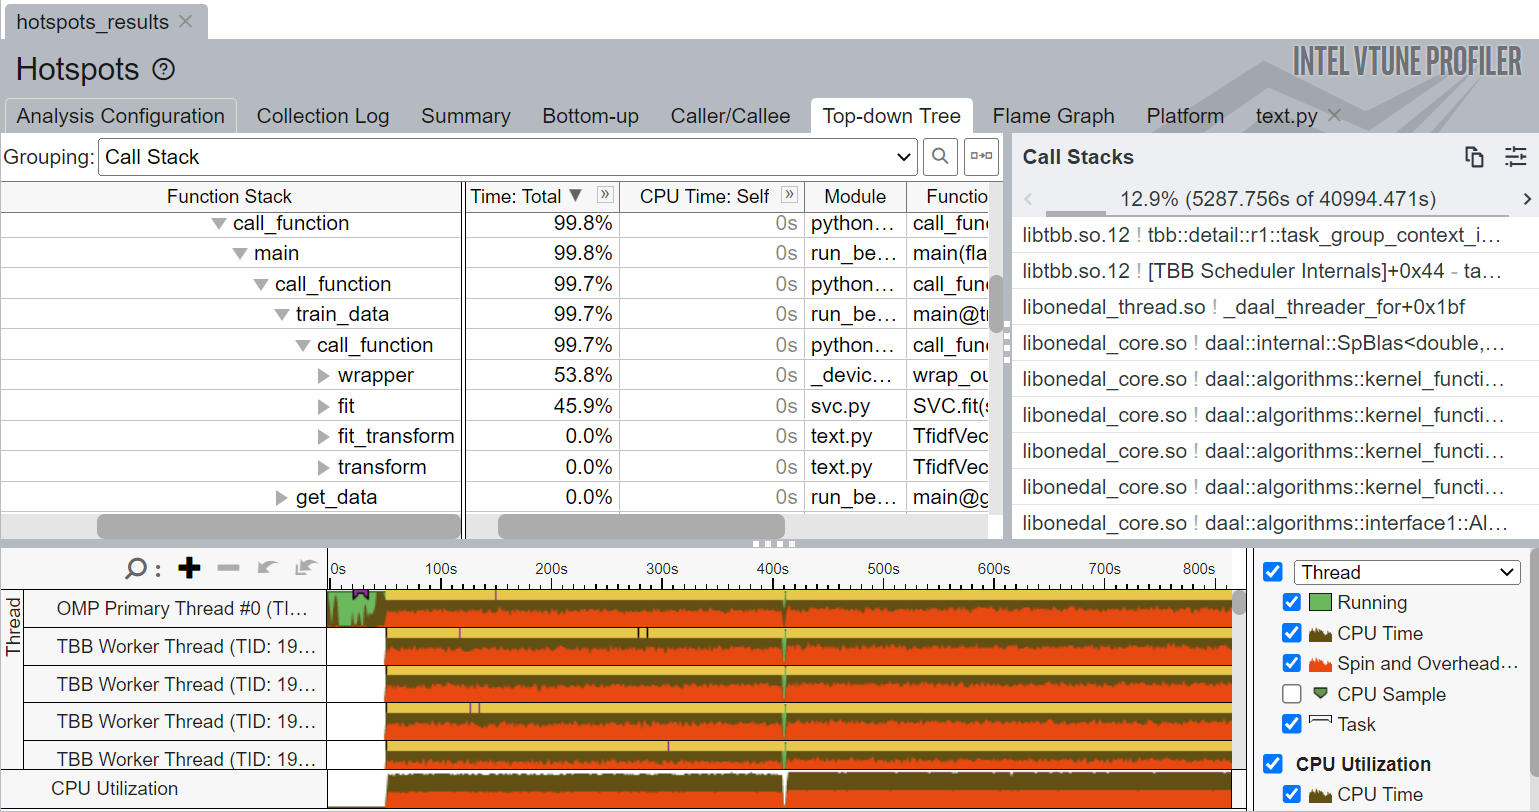

7. To view the **Flame Graph** visit the **Flame Graph** tab. The **color coding** on the top bar shows the information about how different modules are called (example: **User**, **System** etc.) when code is executed.  

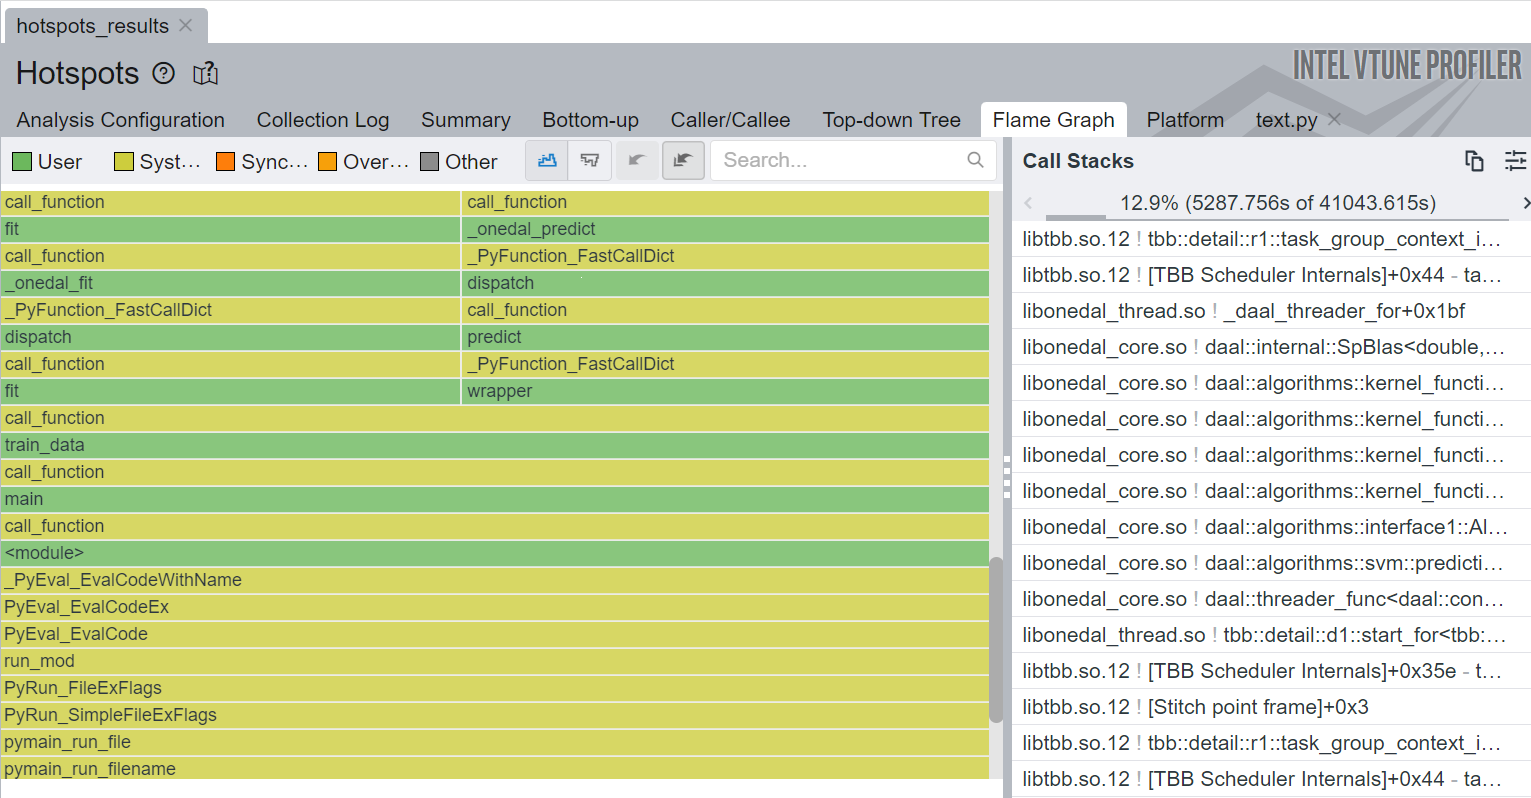

8. The **Platform** tab shows the functions called **with respect to time.** It also shows the **CPU utilization** when the function is called. You can **click** on the **"+"** icon to **Zoom In** and **"-"** icon to **Zoom Out** and adjust the **unit of time axis.**

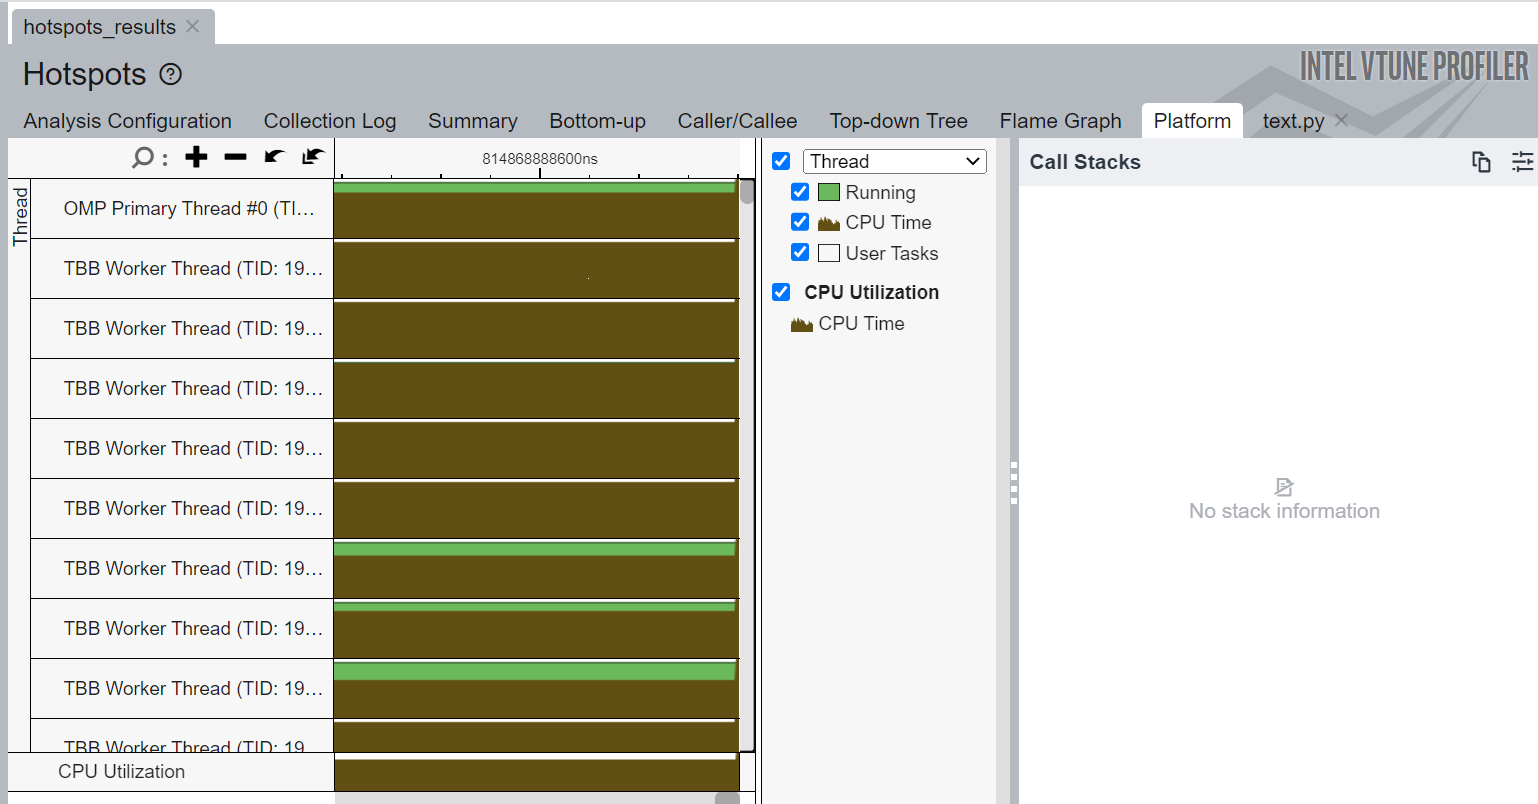